  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

<ipython-input-11-99abe42d446e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


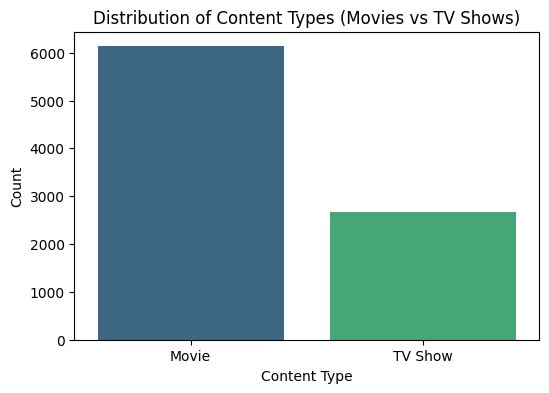

<ipython-input-11-99abe42d446e>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='plasma')


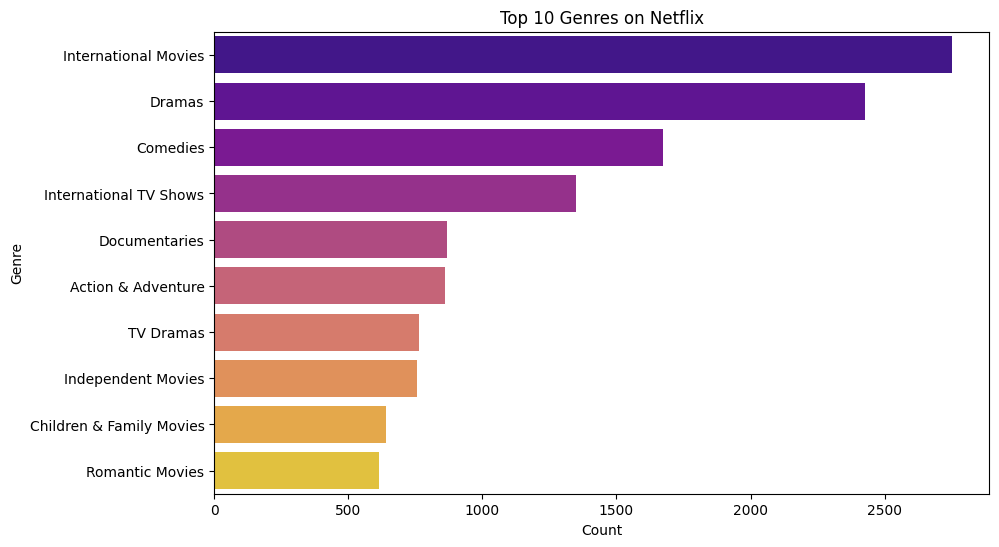

<ipython-input-11-99abe42d446e>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm')


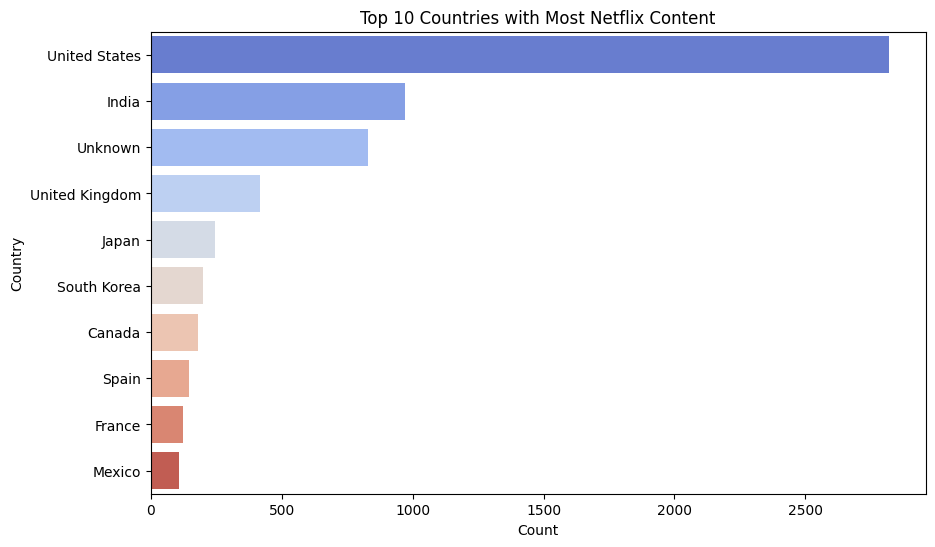

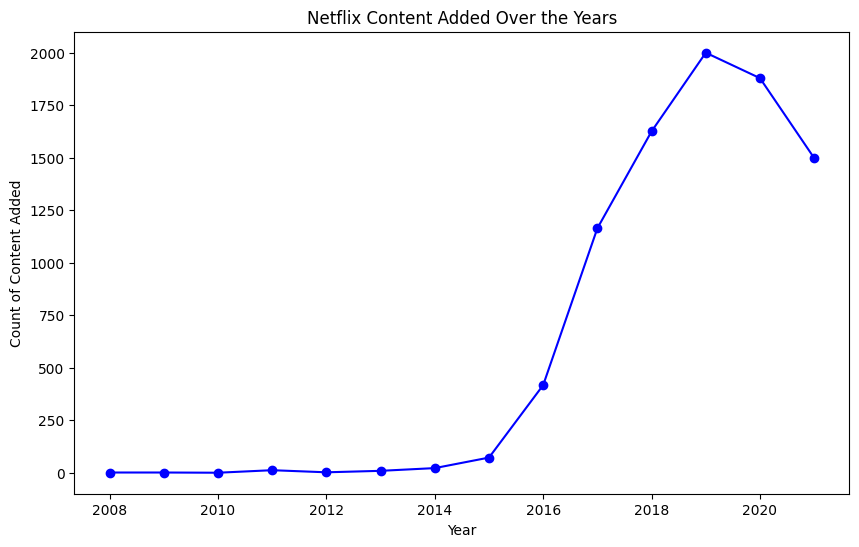

<ipython-input-11-99abe42d446e>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='magma')


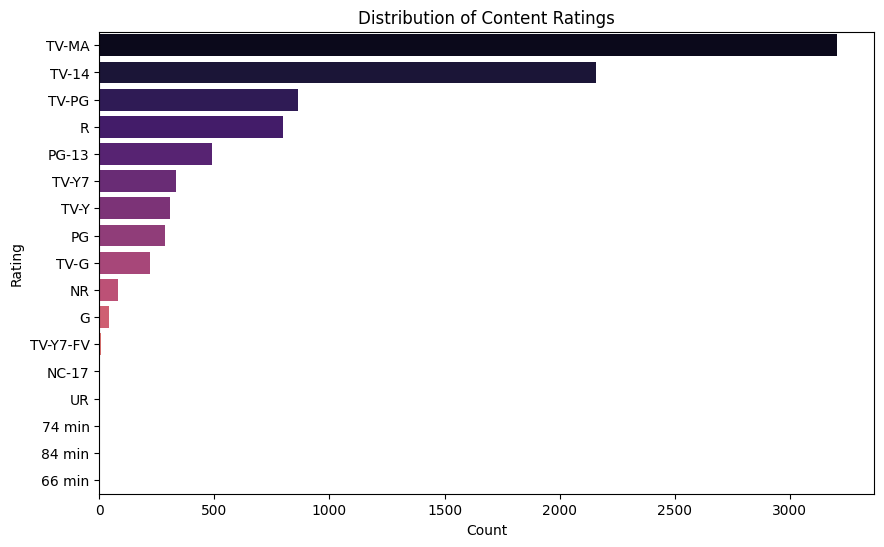

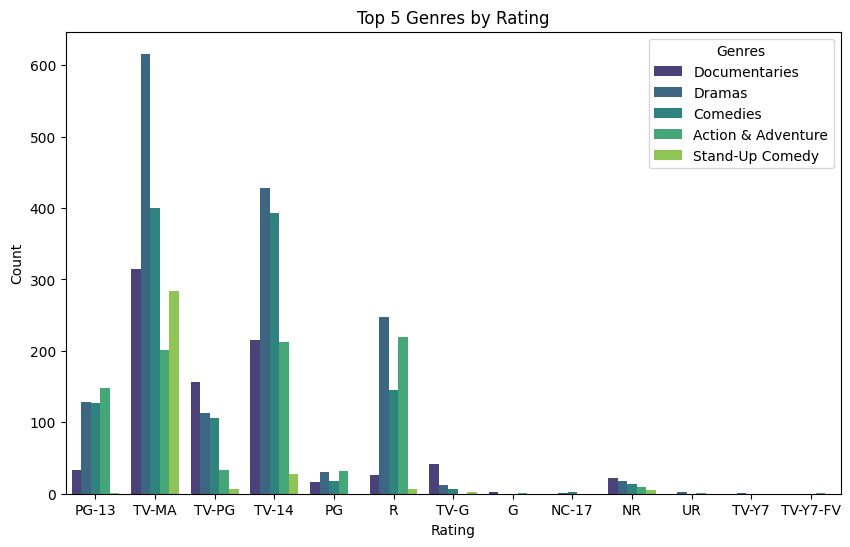

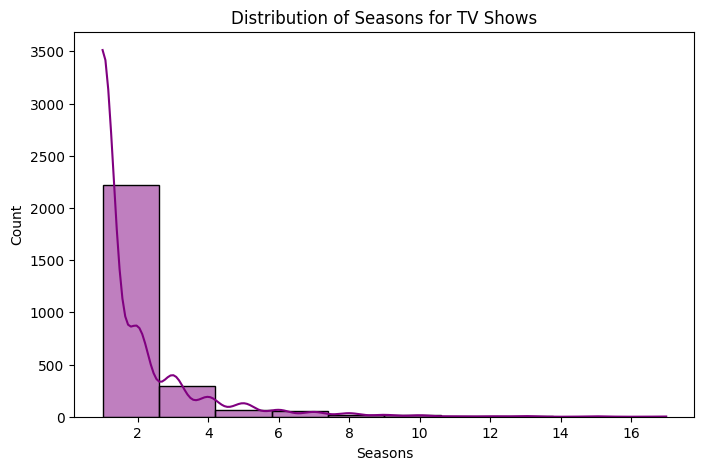

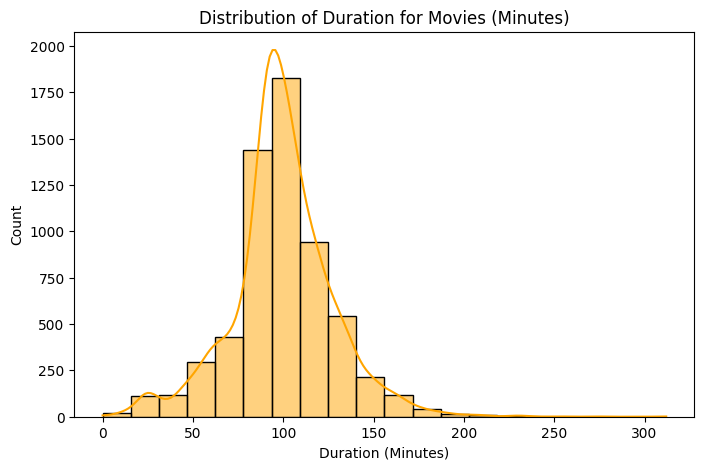


Key Findings:
1. Movies form a larger portion of Netflix's content compared to TV Shows.
2. The most popular genres include Documentaries, Stand-Up Comedy, and Dramas.
3. The US is the largest contributor of content, followed by India and the UK.
4. Netflix has increased its content addition significantly in recent years.
5. Most of the TV Shows have a single season, while Movies vary in duration, typically around 90 minutes.


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("netflix_movies (1).csv")

# Display the first few rows of the dataset
print(df.head())
print(df.shape)

# 1. Data Cleaning and Preparation
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values for 'director', 'cast', and 'country' with 'Unknown'
df = df.assign(
    director=df['director'].fillna('Unknown'),
    cast=df['cast'].fillna('Unknown'),
    country=df['country'].fillna('Unknown')
)


# Convert 'date_added' to DateTime format, setting invalid parsing as NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Separate 'duration' into 'seasons' and 'minutes' based on content type
df['duration_type'] = df['duration'].apply(lambda x: 'Season' if 'Season' in str(x) else 'Minutes')
df['duration_count'] = df['duration'].apply(lambda x: int(str(x).split()[0]) if pd.notnull(x) else 0)

# 2. Exploratory Data Analysis (EDA)

# Content Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Distribution of Content Types (Movies vs TV Shows)")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

# Top 10 Genres (listed_in)
plt.figure(figsize=(10,6))
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='plasma')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Top 10 Countries with Most Content
plt.figure(figsize=(10,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

# Content added by Year
plt.figure(figsize=(10,6))
df['year_added'] = df['date_added'].dt.year
content_per_year = df['year_added'].value_counts().sort_index()
content_per_year.plot(kind='line', marker='o', color='b')
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Content Added")
plt.show()

# Distribution of Ratings
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='magma')
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

# 3. Additional Insights

# Genre by Rating (Top 5 Genres)
top_genres = ['Documentaries', 'Stand-Up Comedy', 'Dramas', 'Comedies', 'Action & Adventure']
df['genres'] = df['listed_in'].apply(lambda x: x.split(', ')[0])
filtered_genres = df[df['genres'].isin(top_genres)]
plt.figure(figsize=(10,6))
sns.countplot(data=filtered_genres, x='rating', hue='genres', palette='viridis')
plt.title("Top 5 Genres by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title='Genres')
plt.show()

# Duration Analysis
# TV Show Seasons Distribution
tv_shows = df[df['type'] == 'TV Show']
plt.figure(figsize=(8,5))
sns.histplot(tv_shows['duration_count'], bins=10, color='purple', kde=True)
plt.title("Distribution of Seasons for TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()

# Movie Duration Distribution
movies = df[df['type'] == 'Movie']
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_count'], bins=20, color='orange', kde=True)
plt.title("Distribution of Duration for Movies (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

# 4. Conclusion and Recommendations (Display Key Findings in Text)
print("\nKey Findings:")
print("1. Movies form a larger portion of Netflix's content compared to TV Shows.")
print("2. The most popular genres include Documentaries, Stand-Up Comedy, and Dramas.")
print("3. The US is the largest contributor of content, followed by India and the UK.")
print("4. Netflix has increased its content addition significantly in recent years.")
print("5. Most of the TV Shows have a single season, while Movies vary in duration, typically around 90 minutes.")

# Save the clean data for further visualization in Power BI if needed
df.to_csv("cleaned_netflix_data.csv", index=False)
